# IV. Basics of Network Analysis


# IV. Введение в сетевой анализ


## 1.Графы улично-дорожной сети из osmnx


Библиотека osmnx предоставляет удобные инструменты для работы с улично-дорожной сетью как с графом.

Графы в osmnx представляют собой математические структуры, где:

- Узлы (nodes) — это объекты на уличной сети, например, перекрестки или конечные точки дорог.
- Ребра (edges) — это соединения между узлами, то есть сегменты дорог, улиц или других типов инфраструктуры.

В osmnx используется структура графа, где ребра могут содержать информацию о расстояниях, времени в пути, типах дорог и других характеристиках транспортной сети. С помощью этого подхода можно анализировать доступность, проводить сетевой анализ, искать кратчайшие пути, строить зоны доступности и многое другое.


In [ ]:
import osmnx as ox
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### 1.1 Получение графа уличной сети


Сначала создадим граф для района с использованием данных OpenStreetMap (OSM).


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public API

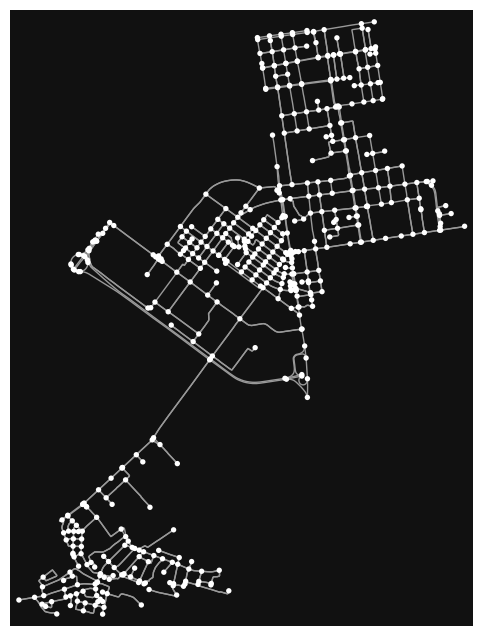

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# Указываем район (например, Ленинский район Екатеринбурга)
location = "Ленинский район, Екатеринбург"

# Получаем граф уличной сети для района с типом "drive" (автомобильный)
graph = ox.graph_from_place(location, network_type='drive')

# Строим граф
ox.plot_graph(ox.project_graph(graph))

### 1.2 Преобразование графа в GeoDataFrame


Для анализа и визуализации данных можно преобразовать граф в геометрический формат, например, в GeoDataFrame, чтобы работать с линиями и узлами как с геометриями


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


<Axes: >

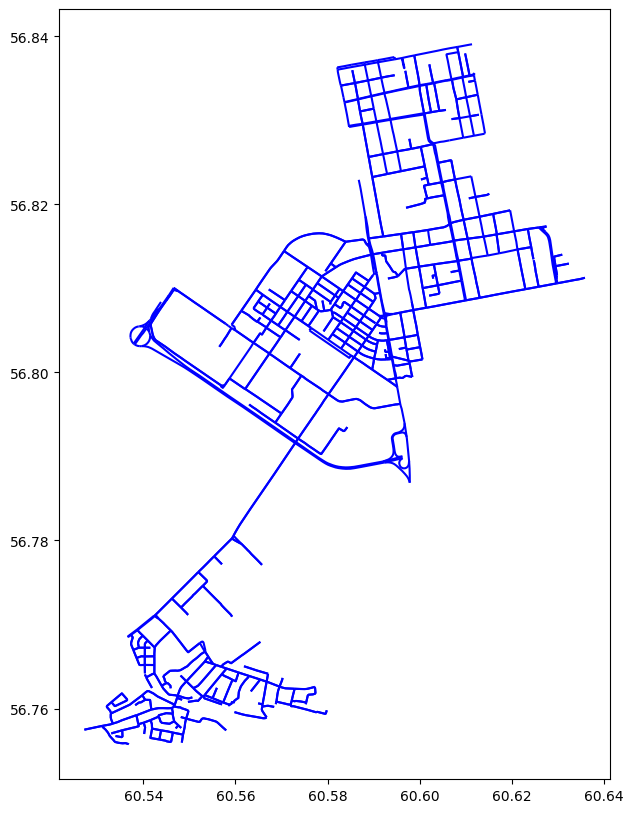

In [ ]:
# Получаем узлы и ребра в формате GeoDataFrame
nodes, edges = ox.graph_to_gdfs(graph)

# Визуализируем ребра
edges.plot(figsize=(10, 10), color='blue')


## 2. Пространственный сетевой анализ и networkx


### 2.1 Поиск кратчайшего пути между двумя точками


Одним из наиболее распространенных применений сетевого анализа является нахождение кратчайшего пути между двумя точками


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and wil

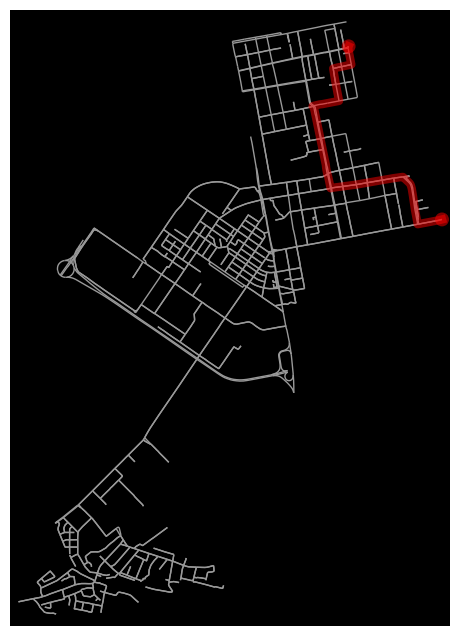

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# Указываем стартовую и конечную точки 
start_coords = (60.6572, 56.8385) 
end_coords = (60.6570, 56.8100)    

# Преобразуем координаты в узлы графа
start_node = ox.distance.nearest_nodes(graph, X=start_coords[0], Y=start_coords[1])
end_node = ox.distance.nearest_nodes(graph, X=end_coords[0], Y=end_coords[1])

# Находим кратчайший путь между двумя узлами
route = nx.shortest_path(graph, source=start_node, target=end_node, weight='length')

# Визуализируем маршрут
ox.plot_graph_route(graph, route, route_linewidth=6, node_size=0, bgcolor='k')


Кратчайший путь между POI


/var/folders/ry/9bb7wrz54vq_kn2ytlj6ynzm0000gn/T/ipykernel_16476/281450167.py:2: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_place(location, tags={"amenity": "restaurant"})
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
 

Shortest path: [223291355, 175048165, 1387234850, 2908690121, 1387234852, 10581827806, 806275555, 176144584, 10798749441, 10798749439]
Shortest distance (meters): 1170.84


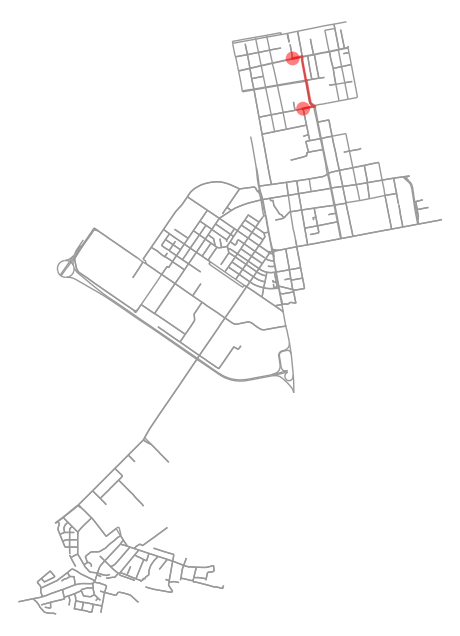

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# Загружаем POI (например, рестораны)
pois = ox.geometries_from_place(location, tags={"amenity": "restaurant"})

# Конвертация POI в ту же систему координат, что и граф
pois = pois.to_crs(graph.graph["crs"])

# Выбираем две случайные точки из pois
random_points = pois.sample(n=2, random_state=42) 
poi_1 = random_points.iloc[0].geometry
poi_2 = random_points.iloc[1].geometry

# Шаг 2: Поиск ближайших узлов графа к POI
orig_node = ox.distance.nearest_nodes(graph, X=poi_1.x, Y=poi_1.y)
dest_node = ox.distance.nearest_nodes(graph, X=poi_2.x, Y=poi_2.y)

# Шаг 3: Кратчайший путь
shortest_path = nx.shortest_path(graph, source=orig_node, target=dest_node, weight="length")
shortest_distance = nx.shortest_path_length(graph, source=orig_node, target=dest_node, weight="length")

print("Shortest path:", shortest_path)
print("Shortest distance (meters):", shortest_distance)

# Визуализация
ox.plot_graph_route(graph, shortest_path, route_linewidth=2, node_size=0, bgcolor="white")


### 2.2 Вычисление центральности в узле графов


Центральность узлов в графе помогает определить важность каждого узла в сети.

Существует несколько типов центральности, которые могут быть использованы в зависимости от задачи:

1. Центральность по степени (Degree Centrality) — измеряет количество связей (ребер), которые имеет узел. Узлы с высокой степенью центральности считаются важными, потому что они подключены к большому числу других узлов.

2. Центральность по посредничеству (Betweenness Centrality) — измеряет, насколько часто узел находится на кратчайших путях между другими узлами. Узлы с высокой центральностью между отношениями являются "мостами", которые связывают различные части сети.

3. Центральность по близости (Closeness Centrality) — измеряет, насколько близко узел расположен к остальным узлам в сети. Узлы с высокой центральностью по близости быстро достигают других узлов, что делает их важными для распространения информации.


In [ ]:
# Преобразуем в проекцию UTM для удобства расчетов
graph_projected = ox.project_graph(graph)

# Центральность по степени
degree_centrality = nx.degree_centrality(graph_projected)

# Центральность по посредничеству  (betweenness centrality)
betweenness_centrality = nx.betweenness_centrality(graph_projected, weight='length')

# Центральность по близости
closeness_centrality = nx.closeness_centrality(graph_projected)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public API

Центральность по степени: На карте уличной сети выделяются наиболее "связанные" узлы.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


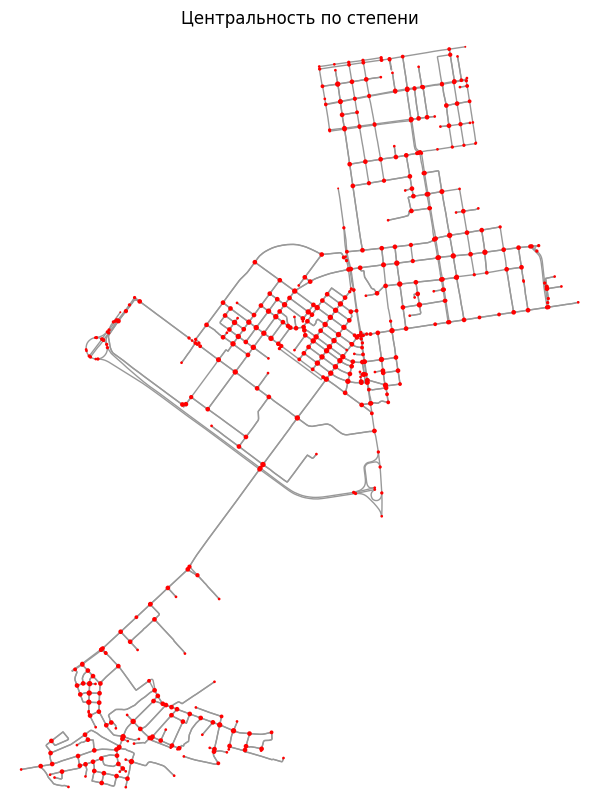

In [ ]:
# Визуализация центральности по степени
fig, ax = plt.subplots(figsize=(10, 10))
node_sizes = [v * 1000 for v in degree_centrality.values()] 

ox.plot_graph(graph_projected, node_size=node_sizes, node_color='red', bgcolor='white', ax=ax, show=False)
plt.title("Центральность по степени")

ax.set_axis_off()

plt.show()

Центральность по посредничеству : Отображение узлов, которые служат "мостами" между различными частями сети.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


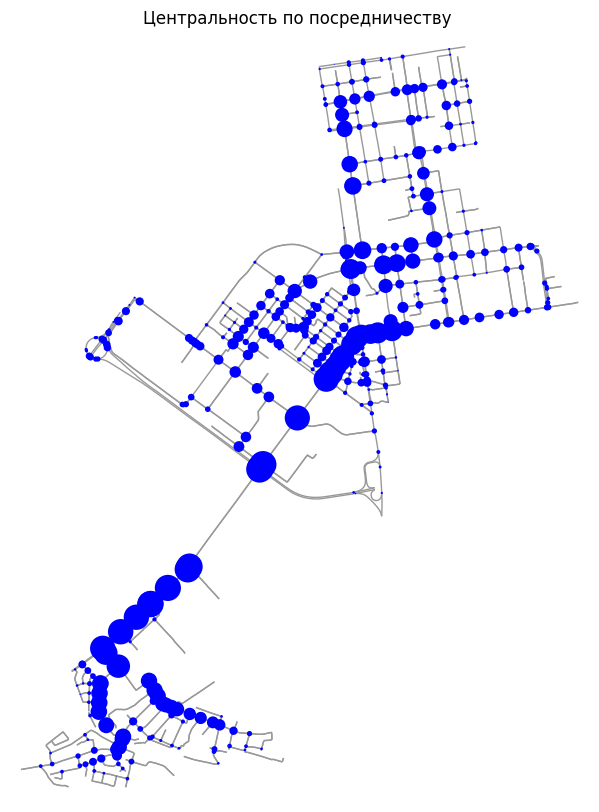

In [ ]:
# Визуализация центральности по посредничеству 
fig, ax = plt.subplots(figsize=(10, 10))
node_sizes = [v * 1000 for v in betweenness_centrality.values()]

ox.plot_graph(graph_projected, node_size=node_sizes, node_color='blue', bgcolor='white', ax=ax, show=False)

ax.set_axis_off()

plt.title("Центральность по посредничеству ")
plt.show()


Центральность по близости: Выделение узлов, которые могут быстро достигать других узлов в сети.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


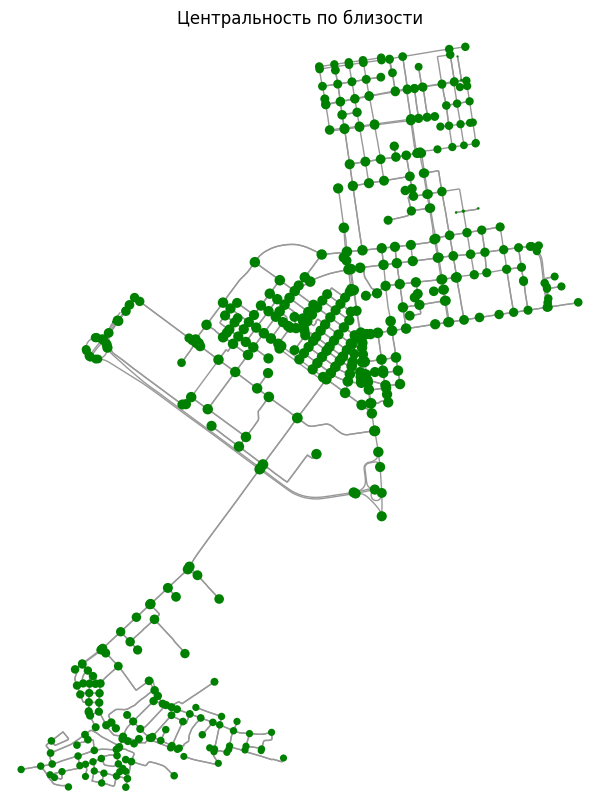

In [ ]:
# Визуализация центральности по близости
fig, ax = plt.subplots(figsize=(10, 10))
node_sizes = [v * 1000 for v in closeness_centrality.values()]

ox.plot_graph(graph_projected, node_size=node_sizes, node_color='green', bgcolor='white', ax=ax, show=False)

ax.set_axis_off()

plt.title("Центральность по близости")
plt.show()

### 2.3 Нахождение компонент связности в графе

Компоненты связности — это подмножества узлов, которые соединены друг с другом рёбрами, и нет рёбер между компонентами. Этот анализ полезен для изучения сегментации сети.


In [ ]:
# Находим компоненты связности в графе
components = list(nx.connected_components(graph.to_undirected()))

# Выводим количество компонент и размер первой компоненты
print(f"Количество компонент связности: {len(components)}")
print(f"Размер первой компоненты: {len(components[0])}")

Количество компонент связности: 1
Размер первой компоненты: 533


- Мы находим компоненты связности в графе, преобразуя его в неориентированный граф.
- Выводим количество компонент и размер первой компоненты.
- Этот анализ помогает понять, насколько сеть разделена на отдельные части.


### 2.4 Вычисление матрицы расстояний между узлами


Матрица расстояний между всеми узлами графа полезна для анализа, чтобы понять, как далеко друг от друга находятся узлы в сети.


In [ ]:
# Вычисляем матрицу расстояний между всеми узлами
distance_matrix = dict(nx.all_pairs_dijkstra_path_length(graph, weight='length'))

# Пример: Расстояние от первого узла до всех других
first_node = list(graph.nodes())[0]
distances_from_first_node = distance_matrix[first_node]

# Выводим первые 5 расстояний
print(list(distances_from_first_node.items())[:5])

[(175048165, 0), (1387234850, 24.667), (2908690121, 55.996), (1387234852, 78.44800000000001), (1387234851, 101.275)]


- Мы вычисляем матрицу расстояний между всеми узлами с использованием алгоритма Дейкстры.
- Выводим расстояния от первого узла до других узлов в графе.
- Эта информация полезна для анализа доступности и плотности сети.


### 2.5 Изохроны (пешеходная доступность)

Изохроны представляют собой области, которые можно достичь за определенный промежуток времени. Например, можно построить изохрону, которая охватывает территорию, которую можно достичь за 15 минут пешком.


In [ ]:
# Указываем координаты начальной точки (например, центр Ленинского района)
start_coords = (60.6572, 56.8385)

# Преобразуем координаты в узел графа
start_node = ox.distance.nearest_nodes(graph, X=start_coords[0], Y=start_coords[1])

# Определяем максимальный радиус для изохроны (например, 15 минут пешеходного пути)
max_time = 15 * 60  # Время в секундах (15 минут)

# Строим подграф (зону доступности) вокруг ближайшего узла
subgraph = nx.ego_graph(graph, start_node, radius=max_time, distance='length')



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and wil

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


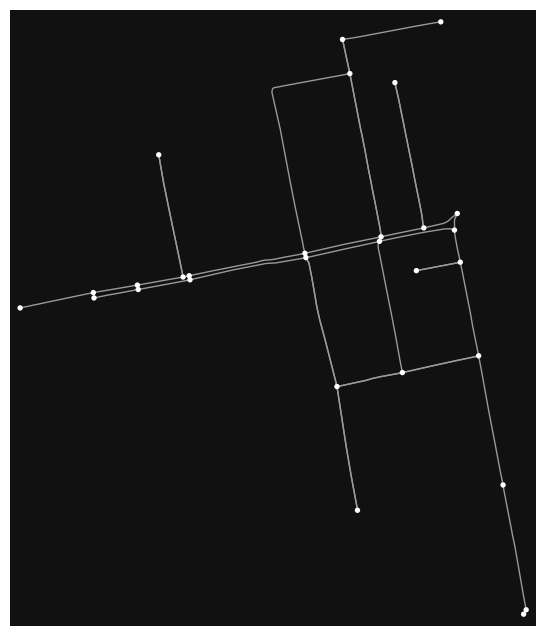

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph(subgraph)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


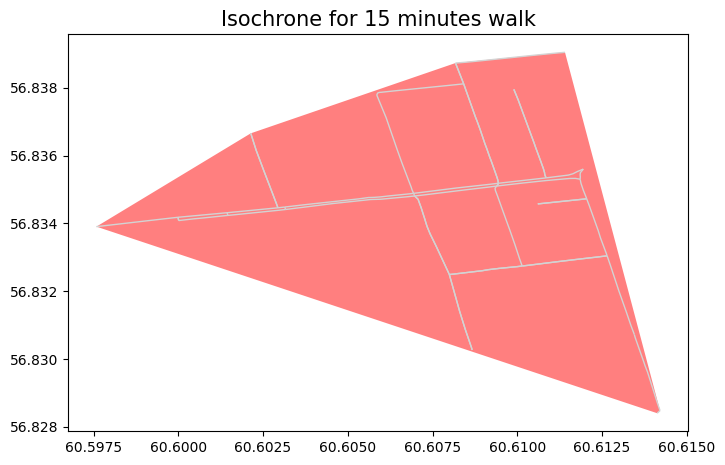

In [ ]:
# Получаем геометрию зоны доступности (линии)
area = ox.convert.graph_to_gdfs(subgraph, nodes=False, edges=True)

# Объединяем все линии в одну геометрию
service_area_lines = area.geometry.unary_union

# Создаем ограничивающую геометрию вокруг участка УДС
isochrone = service_area_lines.convex_hull

# Визуализируем
fig, ax = plt.subplots(figsize=(8, 8))
area.plot(ax=ax, color='lightgray', linewidth=1)
gpd.GeoSeries([isochrone]).plot(ax=ax, color='red', alpha=0.5)
ax.set_title("Isochrone for 15 minutes walk", fontsize=15)
plt.show()



## 3. Пространственный сетевой анализ с использованием внешних API


Множество сервисов и библиотек предоставляют готовые решения для работы с пространственными сетями


### 3.1. [OSRM](https://project-osrm.org)


#### 3.1.1 Кратчайшее расстояние


In [ ]:
import requests

# URL API OSRM
base_url = "http://router.project-osrm.org/route/v1/driving/"

# Координаты точек (долгота, широта)
start_coords = [55.7558, 37.6173]
end_coords = [55.7045, 37.5308]

start = f"{start_coords[1]},{start_coords[0]}" 
end = f"{end_coords[1]},{end_coords[0]}"

# Запрос к API
response = requests.get(f"{base_url}{start};{end}?overview=full")
data = response.json()

# Извлечение расстояния и маршрута
distance = data["routes"][0]["distance"]  # В метрах
route = data["routes"][0]["geometry"]  # GeoJSON

print(f"Shortest distance: {distance / 1000:.2f} km")


Shortest distance: 12.45 km


Посмотрим на результат на карте


In [ ]:
import polyline 
import folium

# Декодируем маршрут из GeoJSON
decoded_route = polyline.decode(route)

# Визуализация с помощью folium
# Создаем карту с центром в стартовой точке
m = folium.Map(location=start_coords, zoom_start=12, tiles='cartodbpositron')

# Добавляем маршрут на карту
folium.PolyLine(decoded_route, color="blue", weight=5, opacity=0.7).add_to(m)

# Добавляем маркеры для стартовой и конечной точки
folium.Marker(start_coords, popup="Start", icon=folium.Icon(color="green")).add_to(m)
folium.Marker(end_coords, popup="End", icon=folium.Icon(color="red")).add_to(m)

# Отображаем карту
m

### 3.2. [Open Route Service](https://openrouteservice.org)


**Примечание:** в этом и последующих разделах результаты не будут отображаться здесь, так как для выполнения кода требуются личные API-ключи. Вы можете получить их в своём личном кабинете у каждого провайдера по соответствующим ссылкам и запустить код локально на компьютере. Места, куда нужно вставить ключ, обозначены как `your_key`.


#### 3.2.1. Изохроны


В запросе мы передаём:

> - **locations** — список из одной точки (координаты, но в формате [долгота, широта]);
> - **range** — список интервалов времени (в секундах), для которых хотим построить изохроны (300 с = 5 мин, 600 с = 10 мин и т. д.);
> - **units** = "m" (метры) и запрашиваем некоторые атрибуты, например, площадь полигона.

Через `requests.post` отправляем запрос, получаем GeoJSON — и сразу же при помощи `gpd.read_file` превращаем его в GeoDataFrame, готовый для дальнейшей визуализации.


In [ ]:
import requests

# API OpenRouteService (требуется ключ API)
ors_api_key = "your_key"
url = "https://api.openrouteservice.org/v2/isochrones/foot-walking"

# Параметры
params = {
    "locations": [[37.6173, 55.7558]], 
    "range": [300, 600, 900],  # Изохроны в секундах (5, 10, 15 минут)
}

headers = {
    "Authorization": ors_api_key,
    "Content-Type": "application/json",
}

# Запрос к API
response = requests.post(url, json=params, headers=headers)
isochrones = response.json()


# Преобразуем GeoJSON в GeoDataFrame
gdf_isochrones = gpd.GeoDataFrame.from_features(
    isochrones["features"], crs="EPSG:4326"
)

#Визуализируем результат на карте
gdf_isochrones.explore( tiles='cartodbpositron')



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/util/ssl_.py:260: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context = SSLContext(ssl_version or PROTOCOL_TLS)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connection.py:407: DeprecationWarning: ssl.match_hostname() is deprecated
  match_hostname(cert, asserted_hostname)


KeyError: 'features'

#### 3.2.2. Кратчайшее расстояние


> 1. Для получения детального маршрута через OpenRouteService указываем два пункта (координаты) в параметре `coordinates`.
> 2. В ответе мы получаем GeoJSON, где в `features` лежит LineString с трассой маршрута.
> 3. `gpd.GeoDataFrame.from_features` позволяет превратить GeoJSON-маршрут в GeoDataFrame, что упрощает отрисовку


In [ ]:
ors_url = "https://api.openrouteservice.org/v2/directions/driving-car"


# Параметры запроса
params = {
    "start": "37.6173,55.7558",
    "end": "37.5665,55.7332",
}

headers = {
    "Authorization": ors_api_key,
}

response = requests.get(ors_url, params=params, headers=headers)
path = response.json()

# Достаем расстояние и время
distance = path["features"][0]["properties"]["segments"][0]["distance"]  # в метрах
duration = path["features"][0]["properties"]["segments"][0]["duration"]  # в секундах

print(f"Distance: {distance / 1000:.2f} km")
print(f"Duration: {duration / 60:.2f} minutes")


# Преобразуем GeoJSON в GeoDataFrame
gdf_path = gpd.GeoDataFrame.from_features(
    path["features"], crs="EPSG:4326"
)

#Визуализируем результат на карте
gdf_path.explore(tiles='cartodbpositron')


#### 3.2.3 Матрица расстояний


> Матрица расстояний (distance matrix) возвращает таблицу, где каждая ячейка (i,j) — это расстояние (или время) от точки i до точки j.
>
> - **locations** — массив координат точек, между которыми нужно узнать расстояния/времена.
> - **metrics** задаёт, что именно возвращать: расстояние (в метрах) и длительность (в секундах).  
>   Результат `matrix_data` — JSON, внутри которого есть `distances` (матрица чисел) и `durations`. Дальше можно загрузить эти данные в Pandas DataFrame и визуализировать в виде «тепловой» матрицы или просто использовать для расчётов.


In [ ]:
ors_matrix_url = "https://api.openrouteservice.org/v2/matrix/driving-car"

# Координаты
locations = [
    [37.6173, 55.7558], 
    [37.5665, 55.7332],  
    [37.5905, 55.7602],
]

data = {
    "locations": locations,
    "metrics": ["distance", "duration"],
}

headers = {
    "Authorization": ors_api_key,
    "Content-Type": "application/json",
}

response = requests.post(ors_matrix_url, json=data, headers=headers)
matrix = response.json()

# Вывод матрицы расстояний
print(matrix["distances"])
print(matrix["durations"])


### 3.3 [Graphopper](https://www.graphhopper.com)


#### 3.3.1. Кратчайшее расстояние


> 1. GraphHopper API позволяет запрашивать маршруты аналогично ORS, но у него немного иной формат запроса:
>    - `point` — список координат в формате «широта,долгота»;
>    - указываем `vehicle="car"` и локализацию `locale="ru"`.
> 2. В ответе `route_gh` содержатся подробности маршрута: дистанция (в метрах), время (в миллисекундах), сам трек (encoded polyline).
> 3. Эту информацию можно декодировать или сразу визуализировать, если преобразовать полилинию в геометрию.


In [ ]:

gh_url = "https://graphhopper.com/api/1/route"
graphhopper_api_key = "your_key"

# Параметры запроса
params = {
    "point": ["55.7558,37.6173", "55.7332,37.5665"],  # Москва, две точки
    "vehicle": "car",
    "key": graphhopper_api_key,
}

response = requests.get(gh_url, params=params)
route = response.json()

# Достаем расстояние и время
distance = route["paths"][0]["distance"]  # в метрах
duration = route["paths"][0]["time"] / 1000  # в секундах

print(f"Distance: {distance / 1000:.2f} km")
print(f"Duration: {duration / 60:.2f} minutes")




#### 3.3.2 Матрица расстояний


> 1. Запрашиваем у GraphHopper матрицу расстояний/времён между списком точек.
> 2. Тело запроса (`body`) содержит:
>    - массив `points` (координаты точек),
>    - список `vehicles` (тип транспортного средства),
>    - `out_arrays` — какие массивы вернуть (расстояния или время).
> 3. Ответ `matrix_gh` будет похож на структуру ORS: вложенные списки, где элемент [i][j] — это дистанция или время между точкой i и j.


In [ ]:
gh_matrix_url = "https://graphhopper.com/api/1/matrix"
headers = {"Content-Type": "application/json"}

# Координаты
locations = [
    [37.6173, 55.7558],  # точка 1
    [37.5665, 55.7332],  # точка 2
    [37.5905, 55.7602],  # точка 3
]

data = {
    "points": locations,
    "vehicle": "car",
    "key": graphhopper_api_key,
}


response = requests.post(gh_matrix_url, json=data, headers=headers)
matrix = response.json()
